# Data Visualization
Now that we have a basic understanding of Python and data manipulation, it is time to learn how to represent data visually!
<br>
<br>
This lecture is comprised of the following components:
<br>
<ul>
<li>Importance of Data Visualization
<li>Introduction to `matplotlib` and `seaborn`
<li>Basic visualization techniques
<li>Visualization Tips and Tricks
<li>Advanced visualization techniques
</ul>


__________
## Importance of Data Visualization

As has been widely established, it is much easier for the human brain to comprehend and process information when it is in the form of graphs, charts, etc. than when it is presented in esoteric spreadsheets and verbose reports. Therefore, when working with large amounts of data, it is crucial to step back and make sense of the data - and data visualization helps do just that!

More specifically, Data Visualization is important for the following reasons:
<ul>
<li><u>Informative</u>: A lot can be told in just a small space!
<li><u>Appealing</u>: A visualization is much more visually appealing than loads of data
<li><u>Efficient</u>: It helps in universal communication!
<li><u>Predictive</u>: It is much easier to observe patterns and predict certain trends via a visualization
</ul>

Note that there are typically two types of visualizations: <b>distributional</b> (using histograms or box plots to assess the distribution of a variable) and <b>correlational</b> (using line plots or scatter plots to understand the relationship between two variables).
_____

## Introduction to matplotlib & seaborn
<a href="https://matplotlib.org/">`matplotlib`</a> is one of the most popular plotting libraries for Python! For those of you who have experience with MATLAB, matplotlib has a similar overall design as MATLAB's graphical plotting. 
<br>
While we will cover matplotlib in further detail below, <a href="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf">'The matplotlib cheatsheet'</a> is a good resource to keep handy!

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

<a href="https://seaborn.pydata.org/introduction.html#introduction">`seaborn`</a> is a Python library, based on top of `matplotlib`. In essence, `seaborn` is complimentary to Matplotlib for the purposes of statistical graphing.

In [2]:
import seaborn as sns

____
## Basic Visualization Techniques
For the following demonstrations, we'll use the famous built-in '<b>iris</b>' dataset!

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
# Extracting septal and petal widths and lengths
X = pd.DataFrame(iris.data,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']) #Name columns according to sklearn API
Y = pd.DataFrame(iris.target)

### Bar Graph
A bar graph is one of the most common techniques and is widely used to convey information in an easy to understand manner! 
<br><br>
It is used to display data that has been classified into nominal or ordinal categories. It represents the respective frequencies/magnitudes for these categories in a comparitve manner. Typically, one axis has numeric values (which may be the frequencies in most cases) and the other axis has the categories.
<br><br>
The bar graph for the dataset has been plotted below:

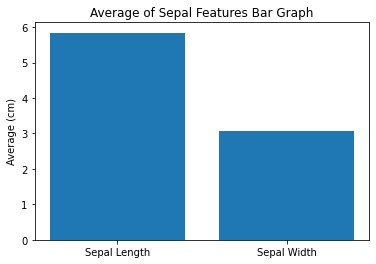

In [7]:
# Dividing the data into categories (Note how .mean() is being used here!)
bar1 = (X['Sepal Length']).mean()
bar2 = (X['Sepal Width']).mean()

# Adding the two bars and assigning attributes
plt.bar([0,1],[bar1,bar2],align='center')

# Add a suitable title
plt.title('Average of Sepal Features Bar Graph')

# Adding suitable labels to the axes
plt.xticks([0,1],['Sepal Length','Sepal Width'])
plt.ylabel('Average (cm)')

# Render the plot
# plt.savefig('bargraph.png',bbox_inches='tight')
plt.show()


Great! We have a bar graph that compares the average length and width of sepals in the given dataset.
<br><br>
<b>Note: </b>Always try to understand why we use the attributes that we do. In the case above, we used align as an attribute. Try changing its value from 'center' to 'edge'; 'edge', as you may have already observed, aligns the left edges of the bars with the x positions. Similarly, try to experiment with some other attributes!
### Histogram
A histogram is very similar to a bar graph - but it represents a <b>continuous</b> variable on its x-axis rather than discrete units like a bar graph. Because it is continuous, we need to specify how many bars we need in total, and in order to do so, we need to set the width of each bar, called <b>bin size</b>.
<br><br>
While we will use a random number (i.e. 150) as our bin size for ease of demonstration, choosing the correct bin size can be very important at times. It also has some <a href="http://www.statisticshowto.com/choose-bin-sizes-statistics/">interesting statistical reasoning</a> behind it!
### Example 1:
Enter the code to make a histogram with a title and axis labels, and a bin size of 150. The X axis would be have the 'Sepal Width' column, and the Y axis would have the frequency.

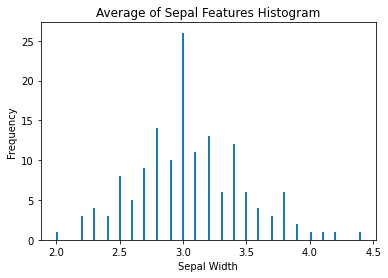

In [17]:
# Use .hist() and add necessary arguments in the parenthesis - this should be only 1 line!
# Refer to https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(X['Sepal Width'], bins = 150)

# Add a title
plt.title('Average of Sepal Features Histogram')

# Add x and y labels
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

# Show the plot!
plt.show()

### Density Plot
While histograms are popular, density plots are also favored for several reasons
<ul>
<li>Histogram shape varies wildly depending on the bin size
<li>Density plots smooth out outliers and local fluctuations
</ul>
The second point can be a weakness however, since local fluctuations can be very important. Let's look at an example (we'll be using `seaborn` now!):

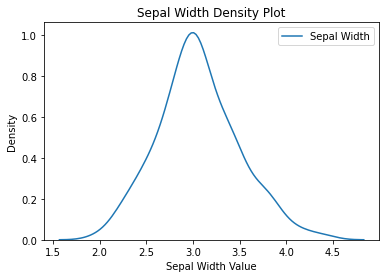

In [18]:
density = sns.kdeplot(X['Sepal Width'])

plt.title ('Sepal Width Density Plot')
plt.xlabel('Sepal Width Value')
plt.ylabel('Density')

plt.show()


The smoothing parameter for the density plot can be adjusted by changing something called the <b>smoothing bandwidth</b> in order to adjust for sensitivity to fluctuations.

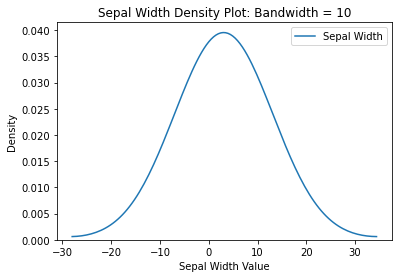

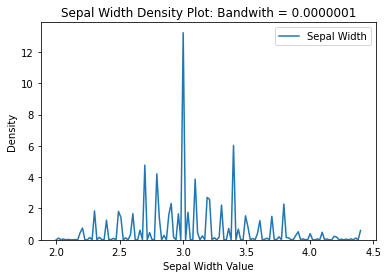

In [19]:
plt.subplot()
# A plot with REALLY high bandwith
sns.kdeplot(X['Sepal Width'], bw=10)

plt.title ('Sepal Width Density Plot: Bandwidth = 10')
plt.xlabel('Sepal Width Value')
plt.ylabel('Density')

plt.show()


plt.subplot()
# A plot with REALLY low bandwidth
sns.kdeplot(X['Sepal Width'], bw=0.0000001)

plt.title ('Sepal Width Density Plot: Bandwith = 0.0000001')
plt.xlabel('Sepal Width Value')
plt.ylabel('Density')

plt.show()


As you can see, the bandwidth value can have a drastic effect on the resulting graph. These are extreme examples, however; appropriate values for bandwidth differ case by case.
### Box Plot
A box plot shows the max, min, and the median values of one feature from a given dataset. It is a great tool when a quick summarization is necessary or when the spread of data needs to be shown. For example, it can be used to visualize test scores.<br>
<br>
An important point to note is that an <b>outlier</b> is a data point that is 1.5 times above the upper quartile or 1.5 times below the lower quartile.

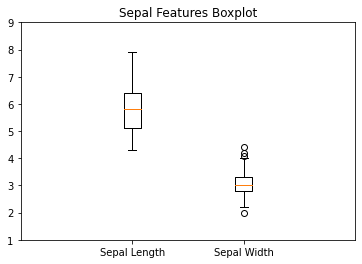

In [20]:
bp = plt.boxplot([X['Sepal Length'],X['Sepal Width']])

plt.title('Sepal Features Boxplot')
plt.xticks([1,2],['Sepal Length','Sepal Width'])
plt.xlim([0,3])
plt.ylim([1,9])

plt.show()


### Violin Plot
A violin plot is very similar to a box plot. The only big difference is that while box plot has a box (which represents IQR: Inter Quartile Range, a range between 25% percentile and 75% percentile of the values) and two whiskers to represent maximum and minimum, violin plot has a three lines that indicates max (100% percentile), median (50% percentile), and min (0% percentile) and also has a <b>probability density distribution</b> of the data at different values along the line.

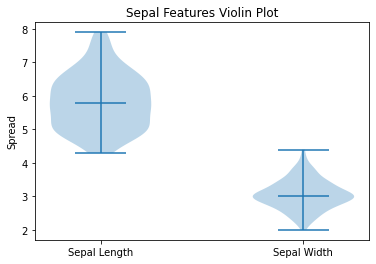

In [21]:
plt.violinplot([X['Sepal Length'],X['Sepal Width']],showextrema=True,showmedians=True)

plt.title('Sepal Features Violin Plot')
plt.xticks([1,2],['Sepal Length','Sepal Width'])
plt.ylabel('Spread')

plt.show()


### Scatter Plot
Scatter plots can be very useful for visualizing information for two or more features (that correspond to the number of dimensions). They are very useful for extrapolating information.
#### 2D Scatter Plot

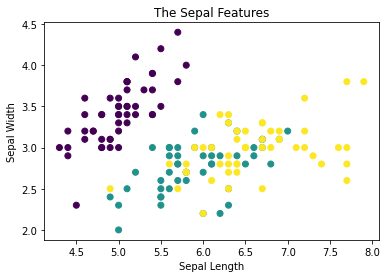

In [22]:
plt.scatter(X['Sepal Length'],X['Sepal Width'], c=Y.values.ravel()) #Colored by species

plt.title('The Sepal Features')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()


We can see that the negative linear correlation is in fact not an apt representation of the data. It is better to understand it in terms of clusters.
<br><br>
It is noticeable that
<ul>
<li>There is a clear clustering behavior for setosa (light blue)</li>
<li>Versicolor and virginica is not clearly separated (brown/orange)</li>
</ul>
This kind of information is valuable in assessing what kind of model to choose, and what kind of additional analysis that needs to take before we are sure of what to do with our dataset. It is possible, however, to further embellish our visual analysis by using a 3d plot and adding in another feature.

#### 3D Scatter Plot

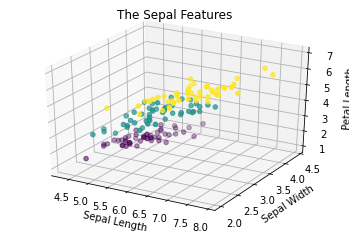

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X['Sepal Length'],X['Sepal Width'],X['Petal Length'],c=Y.values.ravel())

ax.set_title('The Sepal Features')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()


Looking at this 3d scatterplot, we can see that the versicolor and virginica is actually much more separable, unlike what was indicated in our previous 2d plot. We can therefore conclude that these three features are enough to implement an effective classifier.
### Heat Map
Another plot for visualizing density is a heat map. Heat maps are a bivariate distribution which assigns colors to different regions depending on the density (or frequency or magnitude, depending on which feature you are trying to visualize) of values in that region.

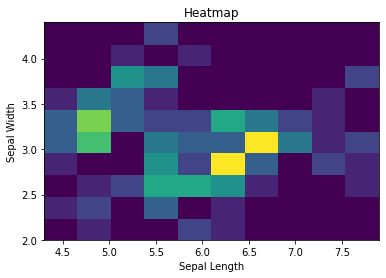

In [24]:
Z, hmx, hmy = np.histogram2d(X['Sepal Length'],X['Sepal Width'])

plt.title('Heatmap')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.pcolormesh(hmx,hmy,Z.T)

plt.show()


### Correlation Plot
Similar to a heat map is a correlation plot. However, instead of looking two variables to find their corrleation, we examine all the variables to determine which are correlated. 

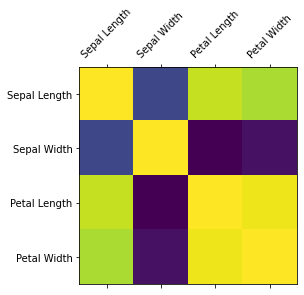

In [25]:
# get the correlation matrix
corr = X.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(corr)

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()


### Contour Map
<b>Contours</b> are lines drawn in the map to show the areas with equal altitude from the ground level. Contour maps are, thus, the data visualization technique in which we draw multiple contours that connect the data points at the same height (in terms of frequency or magnitude) and to examine which data points or clusters are the <b>global maxima</b> and <b>global minima</b>, as well as the overall trend of the <i>distribution</i> and <i>elevation</i> of the given dataset.
<br><br>
It is important to notice that the heatmap and contour mapping is analogous to histograms vs density plots. As such, we must be wary of the advantages and disadvantages of both types of plots.

Contour plots are useful when deciding which parameters to use (defining the number of clusters) for clustering algorithms or Gaussian Naive Bayes.

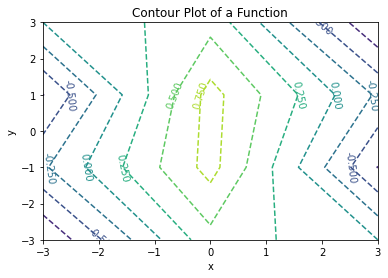

In [26]:
xlist = np.linspace(-3.0, 3.0, 3)
ylist = np.linspace(-3.0, 3.0, 4)
x, y = np.meshgrid(xlist, ylist)
z = np.sin(x**2 +2*x*y+ y**2)

contour = plt.contour (x,y,z,linestyles='dashed')

plt.title('Contour Plot of a Function')
plt.xlabel('x')
plt.ylabel('y')
plt.clabel(contour, inline=False)

plt.show()


_____
### Example 2:
Download the temperatures dataset from the course website and make sure it is in the same folder as this file. Now pick one of the above graph types to visualize one or more columns from the temperatures dataset. Hint: the `drop_duplicates` function may come in handy to reduce the number of points.

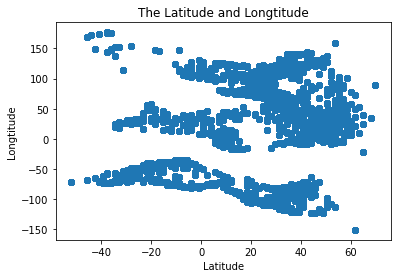

,City,Country,Latitude,Longitude,dt,AverageTemperature,AverageTemperatureUncertainty
0,A Coruña,Spain,42.59,-8.73,1743-11-01,10.779,1.942
1,Aachen,Germany,50.63,6.34,1743-11-01,6.425,1.628
2,Aalborg,Denmark,57.05,10.33,1743-11-01,6.068,1.737
3,Aberdeen,United Kingdom,57.05,-1.48,1743-11-01,8.758,1.886
4,Aix En Provence,France,44.20,4.47,1743-11-01,7.478,1.866


In [75]:
# Read CSV
temps = pd.read_csv('temps.csv')

plt.scatter(temps['Latitude'], temps['Longitude'])

plt.title('The Latitude and Longtitude')
plt.xlabel('Latitude')
plt.ylabel('Longtitude')

# Dropping duplicates for you!
temps_unique = temps.drop_duplicates(subset=['City', 'Country', 'Latitude', 'Longitude'], keep='last')


plt.show()

____
## Visualization Tips and Tricks
### Changing colors
Let's take the bar graph we programmed earlier and change its color!
<br><br>
It's fairly straightforward to do so: Use the attribute `color` when you're creating the barplot, and specify the color of choice! Here's an example that turns the bar plot black.

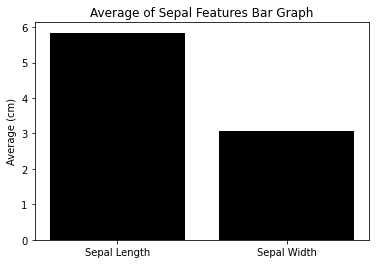

In [40]:
bar1 = (X['Sepal Length']).mean()
bar2 = (X['Sepal Width']).mean()
plt.bar([0,1],[bar1,bar2],align='center', color='black') # Try playing around with this!

plt.title('Average of Sepal Features Bar Graph')
plt.xticks([0,1],['Sepal Length','Sepal Width'])
plt.ylabel('Average (cm)')

plt.show()


We can also change the color map, which changes the color scheme for a variable that is being plotted using color. 
<br><br>
Let's look at our previous scatterplot example and use the attribute `cmap` when you're creating the plot, and specify the map of choice!

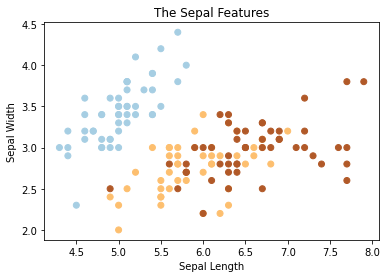

In [41]:
plt.scatter(X['Sepal Length'],X['Sepal Width'],c=Y.values.ravel(),cmap=plt.cm.Paired) #Colored by species using a color map

plt.title('The Sepal Features')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()


Now this is pretty neat, but we still don't know what each color maps to. To fix this, we can add a legend.  
<br><br>
To do this, we will have to assign a specific label to each plotted data point. The simplest way to do this is to split our data into groups by color so we can assign the label to each group. Then, we can call the `legend` function to create a legend from the labels. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


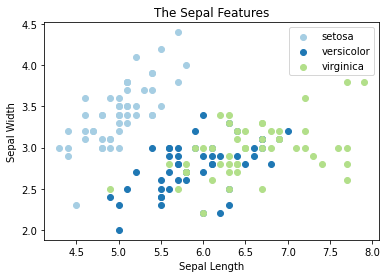

In [42]:
colors = plt.cm.get_cmap('Paired')

for species in np.unique(Y[0]):
    ix = np.where(Y[0] == species)
    plt.scatter(X['Sepal Length'].loc[ix],X['Sepal Width'].loc[ix], c = colors(species), label = iris.target_names[species])

plt.title('The Sepal Features')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

plt.show()


A legend would also be nice for the heatmap we looked at earlier. 
<br><br>
Luckily this is much easier to do, we only need to pass the graph into the `colorbar` function. We can also pass in a color map using the `cmap` attribute again. The `vmin` and `vmax` attributes refer to the bounds of the range.

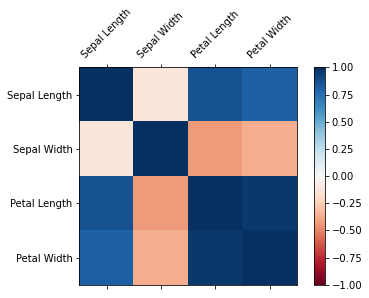

In [52]:
corr = X.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1))

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()


### Subplots

In [44]:
# Creating dummy data
x = np.linspace(0, 3*np.pi, 500)
y = np.sin(x**1.5)

#### Two subplots

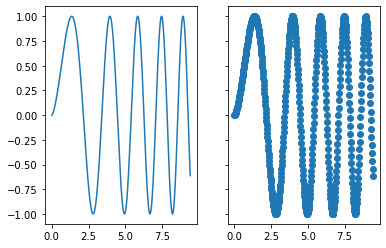

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax2.scatter(x, y)

plt.show()


#### Four subplots


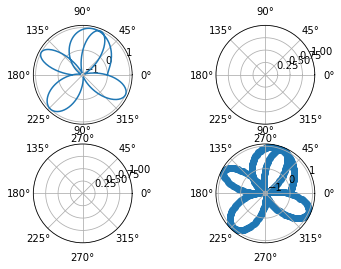

In [46]:
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

plt.show()


### Multiple plots on the same axis
Sometimes, it's useful to plot multiple graphs on the same axes. For example, plotting the scores of two students on the same graph for ease of comparison. While this sounds like a tricky concept, its more straightforward than you'd think!

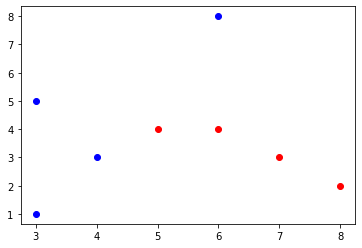

In [47]:
plt.plot([3,4,3,6], [1,3,5,8], 'bo')
plt.plot([5,6,7,8], [4,4,3,2], 'ro') 
# You can add any number of plots this way!

plt.show()


### Error Bars

We are also introducing error bars, which were designed to overcome one of main challenges of data visualization: to represent the uncertainty of the data. Error bars add a whisker to a data point, which indicates a possible ranges of values that the data point can potentially take, rather than designating one definite value.

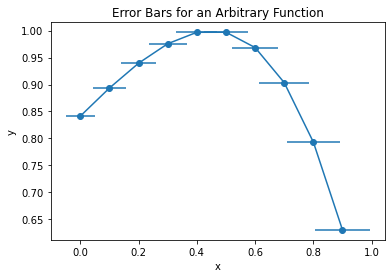

In [48]:
x = np.arange(0,1,0.1)
y = np.sin(np.exp(x))
error = 0.05 + 0.05*x

plt.errorbar(x,y,xerr=error,fmt='-o')

plt.title('Error Bars for an Arbitrary Function')
plt.xlabel('x')
plt.ylabel('y')

plt.show()


_____
### Example 3:
Tweak your previous graph (or create a new one) so it includes one of the above tips and tricks.

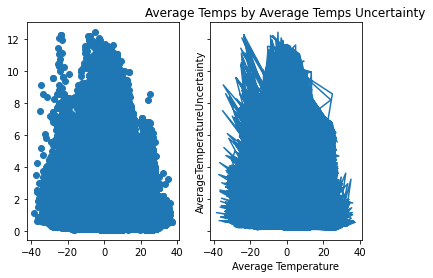

In [81]:
# Read CSV
temps = pd.read_csv('temps.csv')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(temps['AverageTemperature'], temps['AverageTemperatureUncertainty'])
ax2.plot(temps['AverageTemperature'], temps['AverageTemperatureUncertainty'])

plt.title('Average Temps by Average Temps Uncertainty')
plt.xlabel('Average Temperature')
plt.ylabel('AverageTemperatureUncertainty')

# Dropping duplicates for you!
temps_unique = temps.drop_duplicates(subset=['City', 'Country', 'Latitude', 'Longitude'], keep='last')

plt.show()

____
## Advanced Visualization Techniques
There are plenty of other visualization packages such as: 


Languages such as D3 that have much more creative control and can create some pretty cool visualizations: http://www.r2d3.us/covid-19/. 

### Animation
There are additional visual tools that you can use, that for the scope of this course we will only mention. Please refer to these links:
<br><br>
https://matplotlib.org/api/animation_api.html
<br>
https://matplotlib.org/2.0.0/mpl_toolkits/index.html
### Making Maps
You should have downloaded a zip file called Canada_AL26335. Unzip that and make sure the folder is in the same directory as this notebook. Included in the folder you downloaded should be a .shp file (this is a type of file that contains geographic vector data). Performing pip3 install pyshp will install the shapefile python library. 

In [82]:
#Map Data can be obtained here: https://www.igismap.com/canada-shapefile-download-free-adminstrative-boundaries-provinces-and-territories/
#Map Data Manipulation
import shapefile as shp
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
shp_path = './Canada_AL26335/Canada_AL263.shp'
sf = shp.Reader(shp_path)
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    shps = [s.points for s in sf.shapes()]
    #Quebec's data is messed up so I manually entered the records for it
    dat = [sf.record(0)]
    dat.append(sf.record(1))
    dat.append(sf.record(2))
    dat.append(sf.record(3))
    dat.append(sf.record(4))
    dat.append(sf.record(5))
    dat.append(sf.record(6))
    dat.append(sf.record(7))
    dat.append(sf.record(8))
    dat.append(sf.record(9))
    dat.append(sf.record(9))
    dat.append(sf.record(11))
    dat.append(sf.record(12))
    dat[10][0] = '61549'
    dat[10][2] = 'Quebec'
    dat[10][3] = 'Quebec'
    dat[10][4] = 'Quebec'
    dat[10][8] = 'Q176'
    dat[10][9] = 'en:Quebec'
    dat[10][13] = 'CA-QC'
    print(dat[10])
    df = pd.DataFrame(columns=fields, data=dat)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
print(df.name)

#Plotting 1 Province 
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

province = 'Ontario'
prov_id = df[df.name == province].index[0]
plot_shape(prov_id, province)


ModuleNotFoundError: No module named 'shapefile'

____
## References
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html